<a href="https://colab.research.google.com/github/IAMPathak2702/Time-series-analysis/blob/main/Timeseries_Forecasting(Bitcoin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Milestone Project: Time series forecasting in TensorFlow (BitPredict 💰📈)

The goal of this notebook is to get you familiar with working with time series data.

We're going to be building a series of models in an attempt to predict the price of Bitcoin.

Welcome to Milestone Project 3, BitPredict 💰📈!

    🔑 **Note:** ⚠️ This is not financial advice, as you'll see time series forecasting for stock market prices is actually quite terrible.

## What is a time series problem?

Time series problems deal with data over time.

Such as, the number of staff members in a company over 10-years, sales of computers for the past 5-years, electricity usage for the past 50-years.

The timeline can be short (seconds/minutes) or long (years/decades). And the problems you might investigate using can usually be broken down into two categories.

![example time series problems]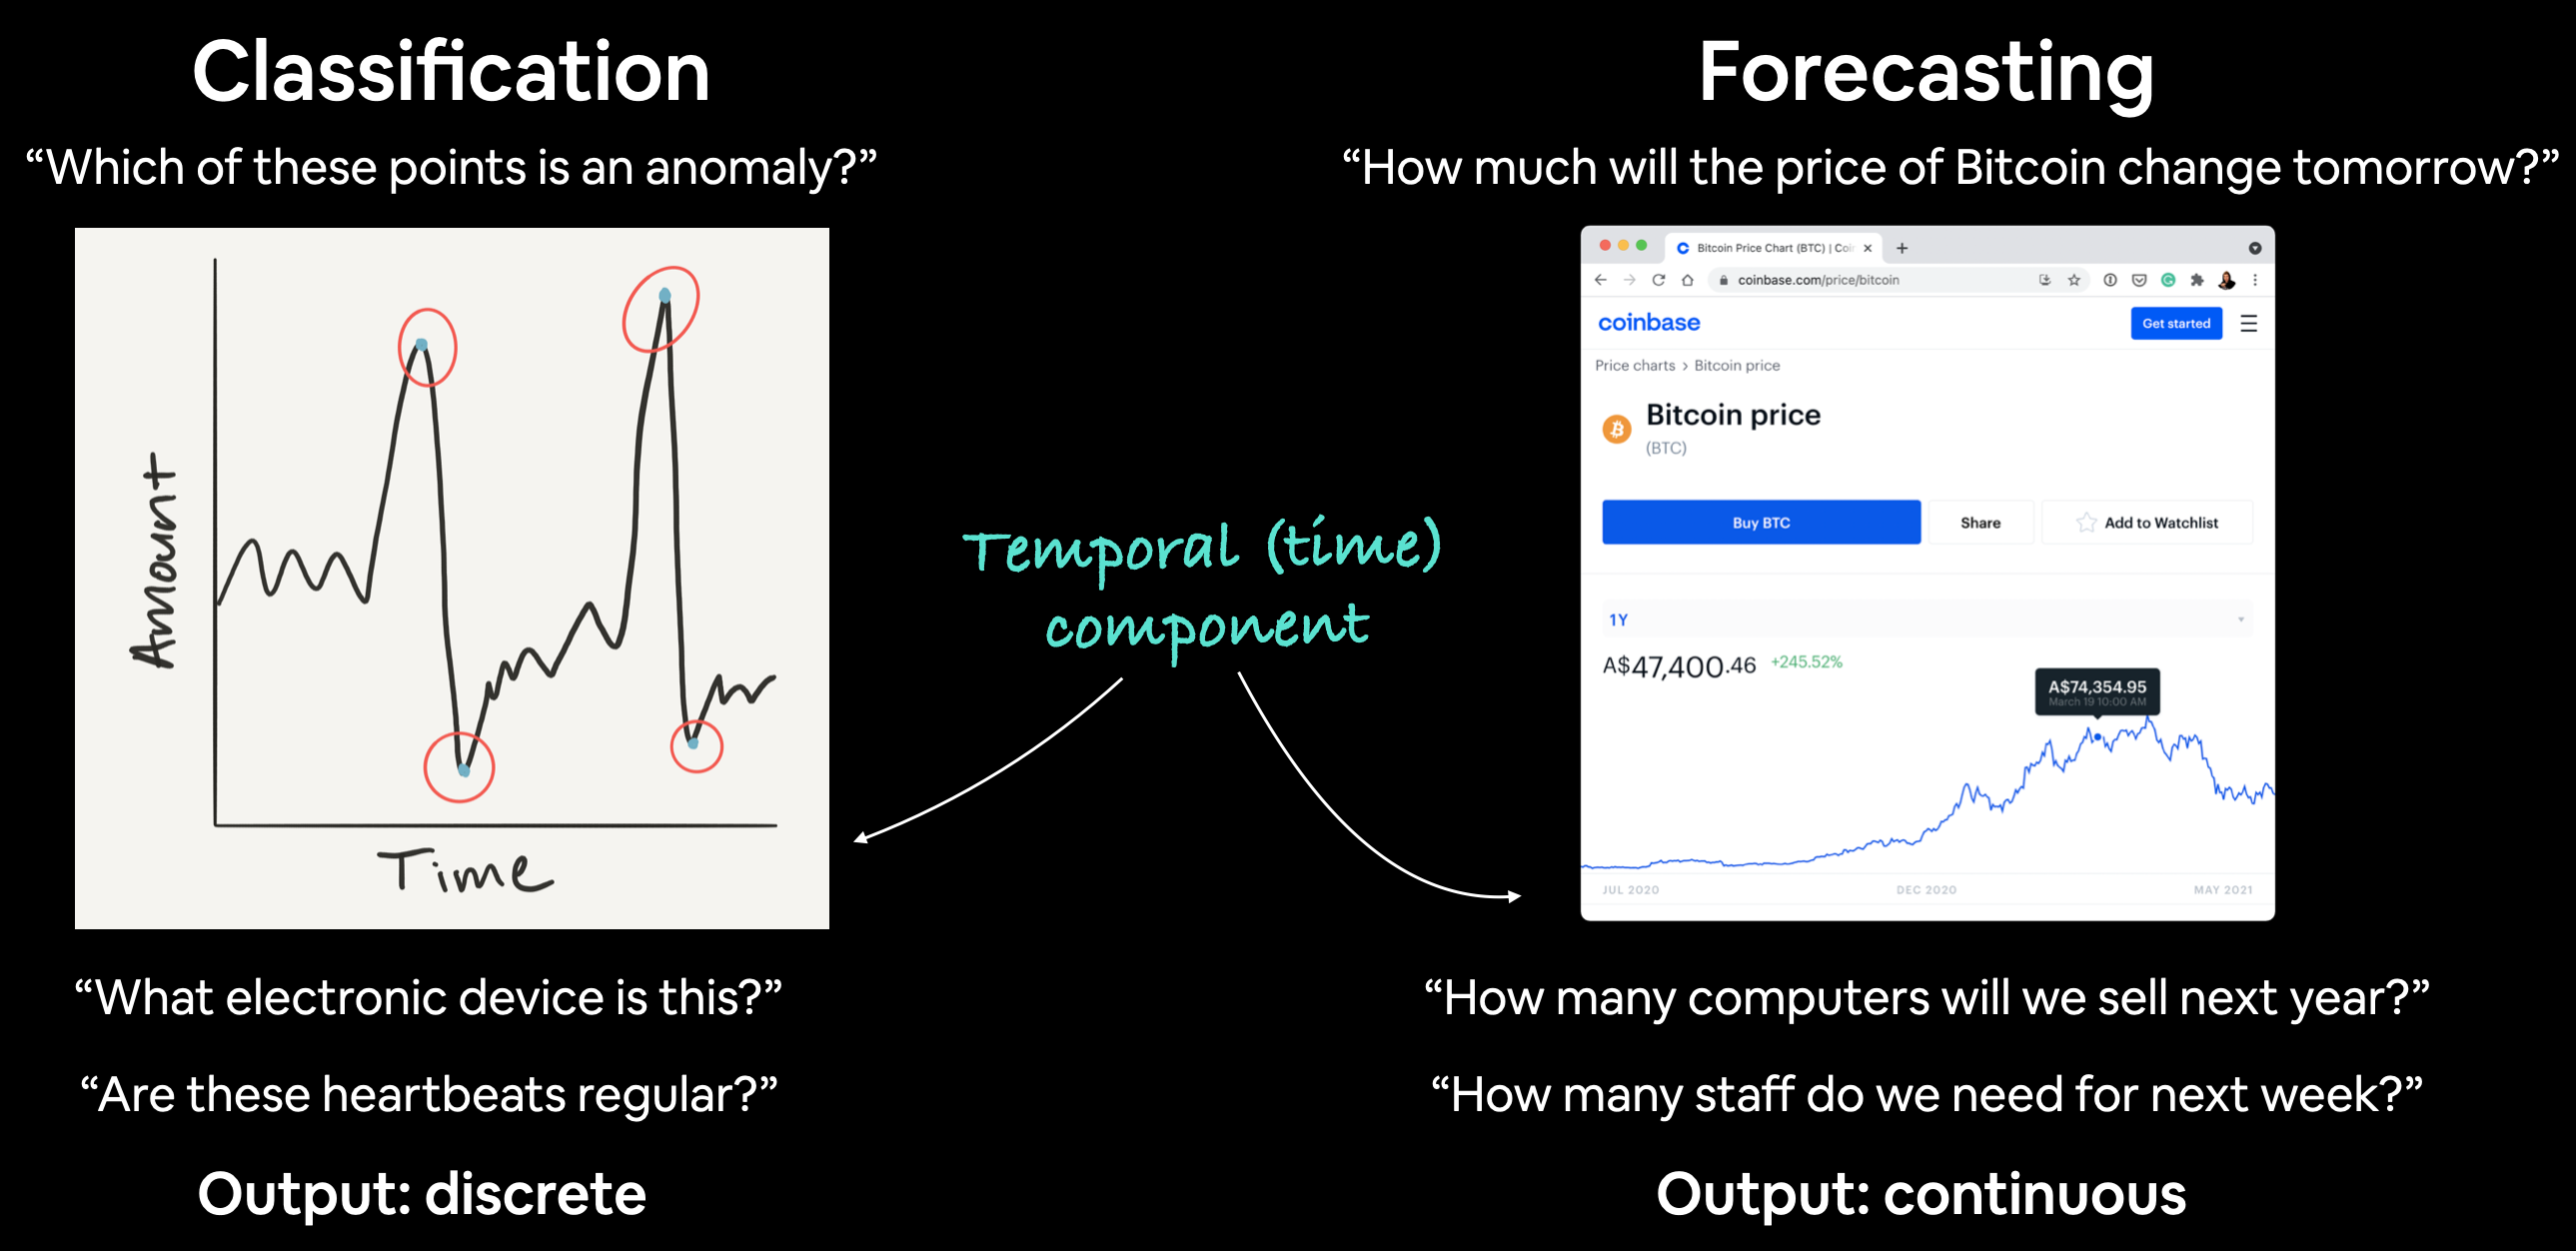

| Problem Type | Examples | Output |
| ----- | ----- | ----- |
| **Classification** | Anomaly detection, time series identification (where did this time series come from?) | Discrete (a label) |
| **Forecasting** | Predicting stock market prices, forecasting future demand for a product, stocking inventory requirements | Continuous (a number) |

In both cases above, a supervised learning approach is often used. Meaning, you'd have some example data and a label assosciated with that data.

For example, in forecasting the price of Bitcoin, your data could be the historical price of Bitcoin for the past month and the label could be today's price (the label can't be tomorrow's price because that's what we'd want to predict).

### Can you guess what kind of problem BitPredict 💰📈 is?

## What we're going to cover

Are you ready?

We've got a lot to go through.

* Get time series data (the historical price of Bitcoin)
  * Load in time series data using pandas/Python's CSV module
* Format data for a time series problem
  * Creating training and test sets (the wrong way)
  * Creating training and test sets (the right way)
  * Visualizing time series data
  * Turning time series data into a supervised learning problem (windowing)
  * Preparing univariate and multivariate (more than one variable) data
* Evaluating a time series forecasting model
* Setting up a series of deep learning modelling experiments
  * Dense (fully-connected) networks
  * Sequence models (LSTM and 1D CNN)
  * Ensembling (combining multiple models together)
  * Multivariate models
  * Replicating the N-BEATS algorithm using TensorFlow layer subclassing
* Creating a modelling checkpoint to save the best performing model during training
* Making predictions (forecasts) with a time series model
* Creating prediction intervals for time series model forecasts
* Discussing two different types of uncertainty in machine learning (data uncertainty and model uncertainty)
* Demonstrating why forecasting in an open system is BS (the turkey problem)

## How you can use this notebook
You can read through the descriptions and the code (it should all run), but there's a better option.

Write all of the code yourself.

Yes. I'm serious. Create a new notebook, and rewrite each line by yourself. Investigate it, see if you can break it, why does it break?

You don't have to write the text descriptions but writing the code yourself is a great way to get hands-on experience.

Don't worry if you make mistakes, we all do. The way to get better and make less mistakes is to **write more code**.

> 📖 **Resource:** Get all of the materials you need for this notebook on the [course GitHub](https://github.com/mrdbourke/tensorflow-deep-learning).



## Importing Relevant Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from keras import Sequential , layers

import random

sns.set()

## Downloading Data

In [ ]:
# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv

--2023-11-17 05:00:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.04s   

2023-11-17 05:00:06 (4.13 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv’ saved [178509/178509]



In [ ]:
# Parse dates and set date column to index
df = pd.read_csv("/content/Bitcoin Historical Data - Investing.com India.csv",
                 parse_dates=["Date"],
                 index_col=["Date"]) # parse the date column (tell pandas column 1 is a datetime)
df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-11-17,"36,440.5","36,161.8","36,636.5","36,109.5",66.61K,0.77%
2023-11-16,"36,161.2","37,873.9","37,907.6","35,561.6",66.92K,-4.52%
2023-11-15,"37,874.9","35,549.3","37,954.1","35,379.6",75.51K,6.54%
2023-11-14,"35,549.3","36,478.3","36,744.5","34,984.3",63.56K,-2.55%
2023-11-13,"36,478.3","37,067.8","37,404.6","36,358.4",44.55K,-1.58%


In [ ]:
df.tail()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2023-10-21,"29,912.9","29,674.7","30,264.8","29,469.1",34.68K,0.80%
2023-10-20,"29,674.5","28,724.0","30,165.9","28,586.1",82.68K,3.31%
2023-10-19,"28,723.0","28,321.8","28,883.8","28,170.2",50.10K,1.42%
2023-10-18,"28,321.7","28,405.2","28,876.0","28,169.0",45.01K,-0.29%
2023-10-17,"28,403.6","28,508.3","28,608.5","28,096.9",53.42K,-0.37%


## Getting information of our data!!

In [ ]:
df.describe(include = 'all')

,Price,Open,High,Low,Vol.,Change %
count,32,32,32,32,32,32
unique,32,32,32,32,32,32
top,"36,440.5","36,161.8","36,636.5","36,109.5",66.61K,0.77%
freq,1,1,1,1,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2023-11-17 to 2023-10-17
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Price     32 non-null     object
 1   Open      32 non-null     object
 2   High      32 non-null     object
 3   Low       32 non-null     object
 4   Vol.      32 non-null     object
 5   Change %  32 non-null     object
dtypes: object(6)
memory usage: 1.8+ KB


In [ ]:
# Sort the DataFrame by the 'Date' column in ascending order
df = df.sort_values(by='Date')


# Reset the index (optional, if you want to reset the row indices)

# Print the sorted DataFrame)
df.drop('Vol.' , inplace = True , axis=1)
df.drop('Change %' , inplace = True , axis = 1)
df

               Price      Open      High       Low     Vol. Change %
Date                                                                
2023-10-17  28,403.6  28,508.3  28,608.5  28,096.9   53.42K   -0.37%
2023-10-18  28,321.7  28,405.2  28,876.0  28,169.0   45.01K   -0.29%
2023-10-19  28,723.0  28,321.8  28,883.8  28,170.2   50.10K    1.42%
2023-10-20  29,674.5  28,724.0  30,165.9  28,586.1   82.68K    3.31%
2023-10-21  29,912.9  29,674.7  30,264.8  29,469.1   34.68K    0.80%
2023-10-22  29,984.2  29,912.7  30,193.4  29,713.6   29.07K    0.24%
2023-10-23  33,041.8  29,984.2  34,375.6  29,891.4  133.46K   10.20%
2023-10-24  33,917.0  33,037.3  35,191.4  32,866.5  159.08K    2.65%
2023-10-25  34,496.8  33,917.0  35,123.9  33,713.4   75.81K    1.71%
2023-10-26  34,153.7  34,497.6  34,826.0  33,749.9   56.62K   -0.99%
2023-10-27  33,901.8  34,153.7  34,245.8  33,423.6   47.33K   -0.74%
2023-10-28  34,082.6  33,901.6  34,387.8  33,867.3   22.00K    0.53%
2023-10-29  34,526.7  34,082.6  34

,Price,Open,High,Low
Date,,,,
2023-10-17,"28,403.6","28,508.3","28,608.5","28,096.9"
2023-10-18,"28,321.7","28,405.2","28,876.0","28,169.0"
2023-10-19,"28,723.0","28,321.8","28,883.8","28,170.2"
2023-10-20,"29,674.5","28,724.0","30,165.9","28,586.1"
2023-10-21,"29,912.9","29,674.7","30,264.8","29,469.1"
2023-10-22,"29,984.2","29,912.7","30,193.4","29,713.6"
2023-10-23,"33,041.8","29,984.2","34,375.6","29,891.4"
2023-10-24,"33,917.0","33,037.3","35,191.4","32,866.5"
2023-10-25,"34,496.8","33,917.0","35,123.9","33,713.4"


In [ ]:
columns_to_convert = ['Price', 'Open', 'High', 'Low']

for column in columns_to_convert:
    df[column] = df[column].str.replace(',', '').astype('float32')

# Print the DataFrame to see the changes
print(df)

                   Price          Open          High           Low
Date                                                              
2023-10-17  28403.599609  28508.300781  28608.500000  28096.900391
2023-10-18  28321.699219  28405.199219  28876.000000  28169.000000
2023-10-19  28723.000000  28321.800781  28883.800781  28170.199219
2023-10-20  29674.500000  28724.000000  30165.900391  28586.099609
2023-10-21  29912.900391  29674.699219  30264.800781  29469.099609
2023-10-22  29984.199219  29912.699219  30193.400391  29713.599609
2023-10-23  33041.800781  29984.199219  34375.601562  29891.400391
2023-10-24  33917.000000  33037.300781  35191.398438  32866.500000
2023-10-25  34496.800781  33917.000000  35123.898438  33713.398438
2023-10-26  34153.699219  34497.601562  34826.000000  33749.898438
2023-10-27  33901.800781  34153.699219  34245.800781  33423.601562
2023-10-28  34082.601562  33901.601562  34387.800781  33867.300781
2023-10-29  34526.699219  34082.601562  34737.898438  33937.60

In [ ]:
df['Price'] = df['Price'].astype(np.float32)
df['Open'] = df['Open'].astype(np.float32)
df['High'] = df['High'].astype(np.float32)
df['Low'] = df['Low'].astype(np.float32)
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 32 entries, 2023-10-17 to 2023-11-17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   32 non-null     float32
 1   Open    32 non-null     float32
 2   High    32 non-null     float32
 3   Low     32 non-null     float32
dtypes: float32(4)
memory usage: 768.0 bytes


In [ ]:
df.to_csv('Upadated_bitcoin_csv.csv')


In [ ]:
len(df)

32

In [ ]:
bitcoin_prices = pd.DataFrame(df["Price"])

<Axes: title={'center': 'Price Chart'}, xlabel='Date', ylabel='BTC Price (USD)'>

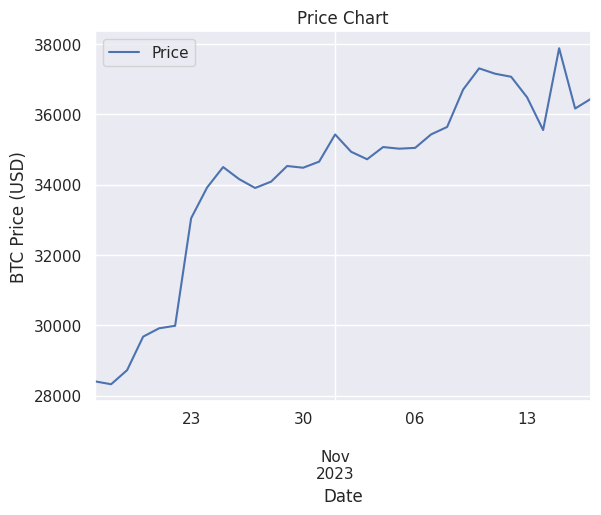

In [ ]:
bitcoin_prices.plot(kind = "line" , title = "Price Chart" , ylabel="BTC Price (USD)")

## Reading CSV file without using Pandas

In [ ]:
import csv
from datetime import datetime
timesteps = []
btc_price = []
with open('/content/Upadated_bitcoin_csv.csv', newline='') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    next(csv_reader) #skip the first line
    for row in csv_reader:
        timesteps.append(datetime.strptime(row[0],"%Y-%m-%d")) #get the dates as date not as string
        btc_price.append(float(row[1])) #get the dates as date not as string

timesteps[:10] , btc_price[:10]

([datetime.datetime(2023, 10, 17, 0, 0),
  datetime.datetime(2023, 10, 18, 0, 0),
  datetime.datetime(2023, 10, 19, 0, 0),
  datetime.datetime(2023, 10, 20, 0, 0),
  datetime.datetime(2023, 10, 21, 0, 0),
  datetime.datetime(2023, 10, 22, 0, 0),
  datetime.datetime(2023, 10, 23, 0, 0),
  datetime.datetime(2023, 10, 24, 0, 0),
  datetime.datetime(2023, 10, 25, 0, 0),
  datetime.datetime(2023, 10, 26, 0, 0)],
 [28403.6,
  28321.7,
  28723.0,
  29674.5,
  29912.9,
  29984.2,
  33041.8,
  33917.0,
  34496.8,
  34153.7])

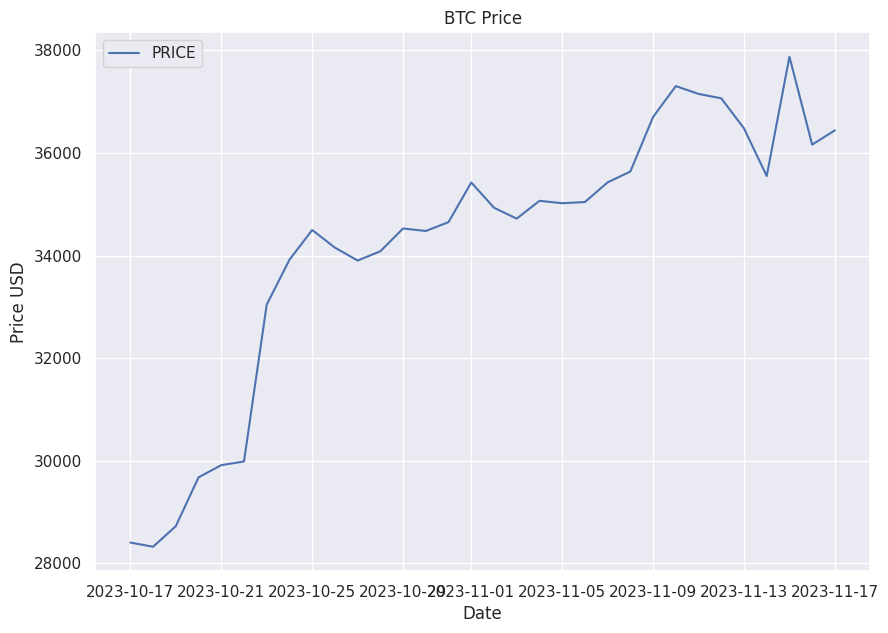

In [ ]:
plt.figure(figsize = (10,7))
plt.plot(timesteps , btc_price , label = "PRICE")
plt.title("BTC Price")
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.legend()
plt.show()

## Format Data -- Part 1

In [ ]:
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()


timesteps,prices

(array(['2023-10-17T00:00:00.000000000', '2023-10-18T00:00:00.000000000',
        '2023-10-19T00:00:00.000000000', '2023-10-20T00:00:00.000000000',
        '2023-10-21T00:00:00.000000000', '2023-10-22T00:00:00.000000000',
        '2023-10-23T00:00:00.000000000', '2023-10-24T00:00:00.000000000',
        '2023-10-25T00:00:00.000000000', '2023-10-26T00:00:00.000000000',
        '2023-10-27T00:00:00.000000000', '2023-10-28T00:00:00.000000000',
        '2023-10-29T00:00:00.000000000', '2023-10-30T00:00:00.000000000',
        '2023-10-31T00:00:00.000000000', '2023-11-01T00:00:00.000000000',
        '2023-11-02T00:00:00.000000000', '2023-11-03T00:00:00.000000000',
        '2023-11-04T00:00:00.000000000', '2023-11-05T00:00:00.000000000',
        '2023-11-06T00:00:00.000000000', '2023-11-07T00:00:00.000000000',
        '2023-11-08T00:00:00.000000000', '2023-11-09T00:00:00.000000000',
        '2023-11-10T00:00:00.000000000', '2023-11-11T00:00:00.000000000',
        '2023-11-12T00:00:00.000000000

### Creating Data wrong way for train/test data

In [ ]:
from sklearn.model_selection import train_test_split as tts

X_train,X_test , y_train , y_test  = tts(timesteps , prices , test_size = 0.2, random_state=42)


X_train.shape,X_test.shape , y_train.shape , y_test.shape



((25,), (7,), (25,), (7,))

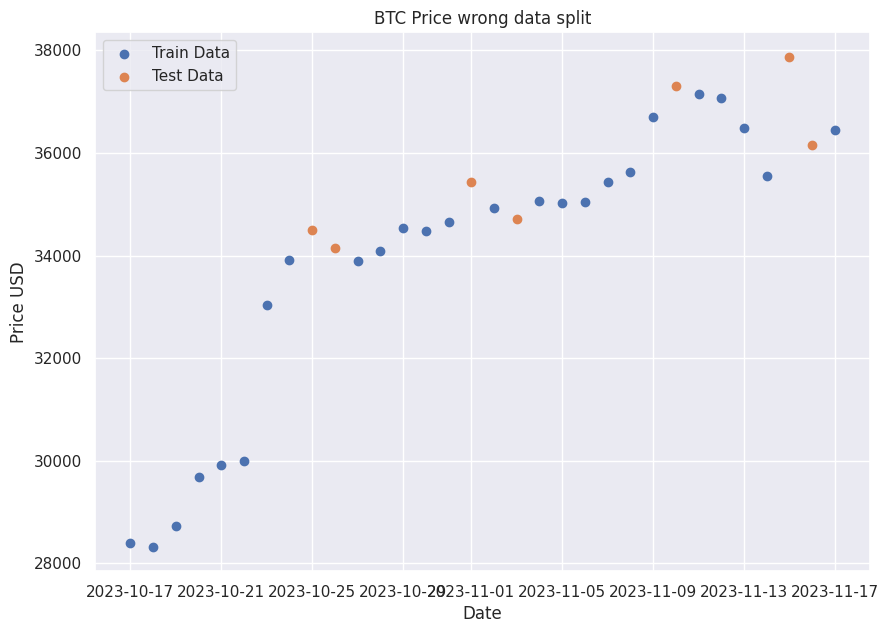

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(X_train,y_train , label = 'Train Data')
plt.scatter(X_test,y_test, label = 'Test Data')
plt.title("BTC Price wrong data split")
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.legend()
plt.show()

### Create train and test sets for time series(the right way)

In [ ]:
split_size = int(0.8 * len(prices))

# Create Train data splits
X_train , y_train = timesteps[:split_size] , prices[:split_size]

# Create Test data split
X_test, y_test = timesteps[split_size:] , prices[split_size:]

len(X_train),len(X_test) , len(y_train) ,len(y_test)

(25, 7, 25, 7)

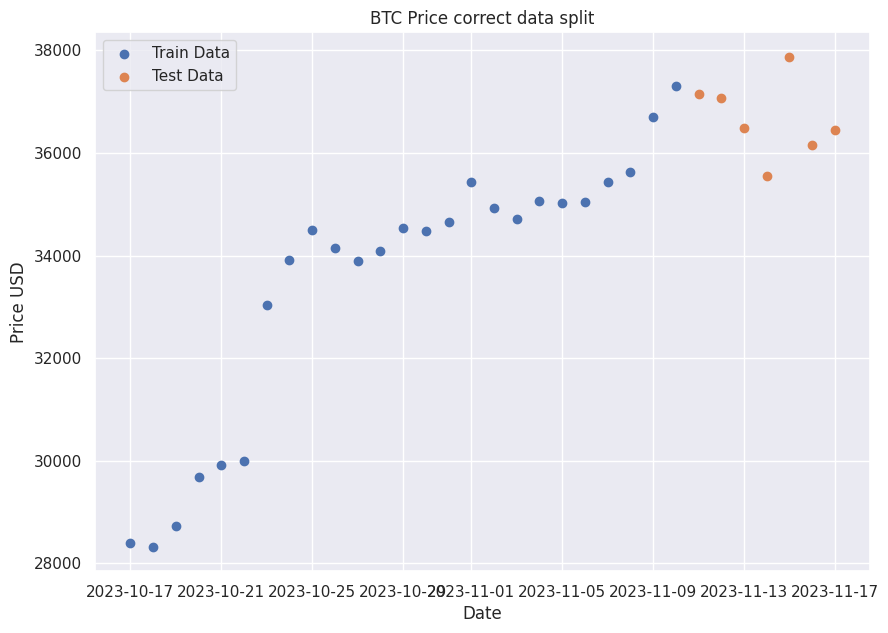

In [ ]:
plt.figure(figsize = (10,7))
plt.scatter(X_train,y_train , label = 'Train Data')
plt.scatter(X_test,y_test, label = 'Test Data')
plt.title("BTC Price correct data split")
plt.xlabel("Date")
plt.ylabel("Price USD")
plt.legend()
plt.show()

## Creating a function to plot a time series data

In [ ]:
def plot_time_series(timesteps ,values , format=".",start=0 , end=None , label=None):
    """
    PLot timesteps(a series of point in time) against values ( a series of  value across timesteps)
    """

    plt.plot(timesteps[start:end], values[start:end], format , label = label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize = 14)
    plt.grid(True)


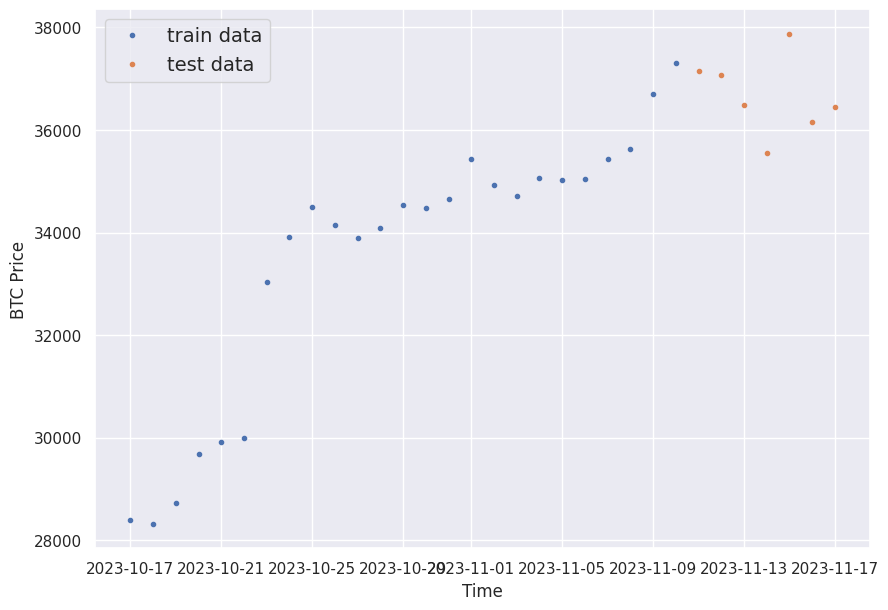

In [ ]:
plt.figure(figsize = (10,7))
plot_time_series(X_train , y_train ,label = 'train data')
plot_time_series(X_test, y_test , label = "test data")


## Various Experiments

We have Bitcoin historical data, and we need to determine which model is the most suitable:

1. Naive Model (Baseline)
2. Dense Model with [horizon = 1 , Window Size = 7]
3. Dense Model with [horizon = 1 , Window Size = 30]
4. Dense Model with [horizon = 7 , Window Size = 30]
5. Conv1D Model
6. LSTM Model
7. Dense Model with Multivariate Data
8. N-BEATS Algorithm
9. Future Prediction Model
10. Dense Model with Turkish Data Integration

    **Horizon** = Number of timesteps in future we are going to predict

    **Window Size** = number of timesteps we are going to use to predict ***horizon***

## Model_0 - Naive Forecast (Baseline Model)
the formulae look like
$$\hat{y}_{t} = y_{t-1}$$

In [ ]:
naive_forecast = y_test[:-1]
naive_forecast[:10]

array([37150.5, 37064.4, 36478.3, 35549.3, 37874.9, 36161.2],
      dtype=float32)

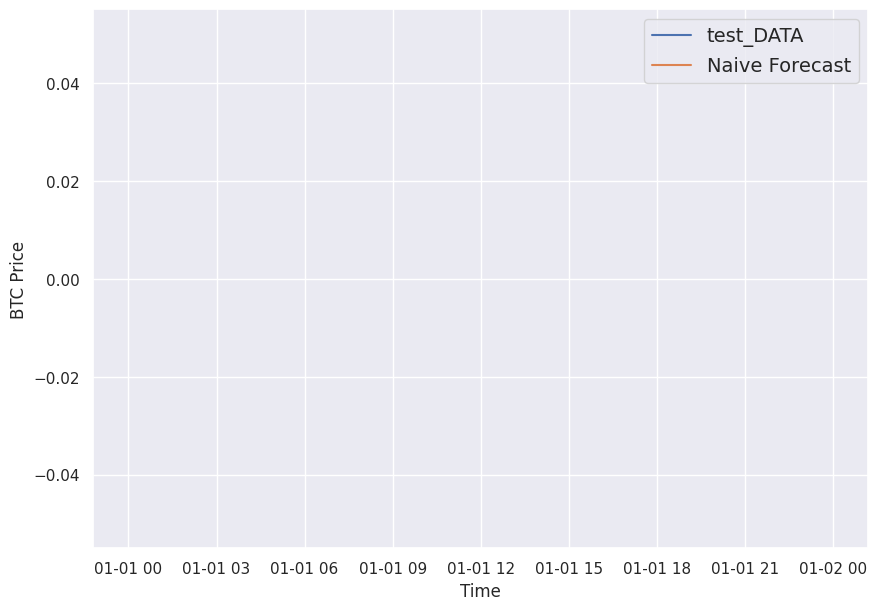

In [ ]:
plt.figure(figsize = (10,7))
# plot_time_series(X_train , y_train , label = "TRAIN_DATA")
plot_time_series(X_test , y_test ,format = "-", start=500 ,label = "test_DATA")
plot_time_series(X_test[1:] , naive_forecast ,format = "-",start=500, label = "Naive Forecast")

## Evaluating a time series Model

What are we doing?

We're predicting a number , so that means we have a form of a regression problem , so we need some regression like metrics.

a few common regression metrics ( which can also be used for time series forecasting)

* MAE - Mean Absolute Erroe
* MSE - Mean Square Error
* Huber loss - Combination of both MAE and MSE
* RMSE - Root Mean Sqaure Error
* sMAPE - Symmetric Mean Absolute Precentage Error
* MASE - Mean absolute Scaled Error

📝Note : **Lower the score the Better it is**

### Creating function to Calculate MAE

In [ ]:
def mean_absolute_scaled_error(y_true , y_preds):
    """
    Implementing MASE ( assuming no seasonality of the data).
    """

    mae = tf.reduce_mean(tf.abs(y_true-y_preds))

    ## find mae of naive forecast
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:]-y_true[:-1]))

    return (mae/mae_naive_no_season)

In [ ]:
mean_absolute_scaled_error(y_test[1:],naive_forecast)

<tf.Tensor: shape=(), dtype=float32, numpy=0.84563285>

### Creating a functions to take in model predictions and the truth value and return evaluation metrics

In [ ]:
y_test.dtype

dtype('float32')

In [ ]:
def evaluate_preds(y_true, y_preds):
    """
    Evaluates the performance of a model's predictions by calculating various regression metrics.

    Parameters:
    - y_true (tf.Tensor or array-like): True target values.
    - y_preds (tf.Tensor or array-like): Predicted target values.

    Returns:
    A dictionary containing the following regression metrics:
    - "MAE" (Mean Absolute Error): A measure of the average absolute differences between true and predicted values.
    - "MSE" (Mean Squared Error): A measure of the average squared differences between true and predicted values.
    - "RMSE" (Root Mean Squared Error): The square root of MSE, providing a measure of error in the original units of the data.
    - "MAPE" (Mean Absolute Percentage Error): A measure of the average percentage difference between true and predicted values.
    - "MASE" (Mean Absolute Scaled Error): A measure that scales MAE by the mean absolute difference between consecutive observations
      in the true values, useful for time series data.

    Note: Both y_true and y_preds should have the same shape.

    Example:
    >>> true_values = [3.0, 2.5, 5.1, 6.7]
    >>> predicted_values = [2.8, 2.7, 5.0, 6.5]
    >>> results = evaluate_preds(true_values, predicted_values)
    >>> print(results)
    {
        "MAE": 0.175,
        "MSE": 0.030625,
        "RMSE": 0.175,
        "MAPE": 2.94,
        "MASE": 0.624
    }
    """
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_preds = tf.cast(y_preds, dtype=tf.float32)

    mae = tf.keras.metrics.mean_absolute_error(y_true, y_preds)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_preds)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_preds)
    mase = mean_absolute_scaled_error(y_true, y_preds)


    if mae.ndim >0:
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
    return {
        "MAE": mae.numpy(),
        "MSE": mse.numpy(),
        "RMSE": rmse.numpy(),
        "MAPE": mape.numpy(),
        "MASE": mase.numpy()
    }


In [ ]:
naive_results = evaluate_preds(y_test[1:],y_preds = naive_forecast)
naive_results

{'MAE': 986.6328,
 'MSE': 1606190.5,
 'RMSE': 1267.3557,
 'MAPE': 2.6829996,
 'MASE': 0.84563285}

## Format data part 2: Windowing our Data
Why do we window?

we window our time series dataset to turn our data into a supervised learning Problem.

```
window for one week
[0,1,2,3,4,5,6] -> 7
[1,2,3,4,5,6,7] -> 8
[2,3,4,5,6,7,8] -> 9
[3,4,5,6,7,8,9] -> 10
[4,5,6,7,8,9,10] -> 11
```

In [ ]:
## What we want to do with our data?
print(f"We want to use : {btc_price[:7]} , to predict this : {btc_price[7]}")


We want to use : [28403.6, 28321.7, 28723.0, 29674.5, 29912.9, 29984.2, 33041.8] , to predict this : 33917.0


### Global Variables

In [ ]:
## let set up some global variable
HORIZON = 1
WINDOW_SIZE = 7

## Creating a function for windowing our data

In [ ]:
def get_labelled_windows(x , horizon = HORIZON):
    '''
    Creates Label for windows dataset.

    Input : [140.3, 123.0, 131.0, 136.8, 136.7, 137.8, 135.8] , Output : 136.5
    '''
    return x[:, :-horizon], x[:, -horizon:]

In [ ]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8)+1, axis=0), horizon=HORIZON)
print(f"Window: {tf.squeeze(test_window).numpy()} -> Label: {tf.squeeze(test_label).numpy()}")

Window: [1 2 3 4 5 6 7] -> Label: 8


### Window step of specific window size:

Creates a window step of specific window size,
    
    example: [[0, 1, 2, 3, 4, 5, 6, 7]]

Uses NumPy indexing to create a 2D of multiple window steps,
    
    example:
    [[0, 1, 2, 3, 4, 5, 6, 7],
    [1, 2, 3, 4, 5, 6, 7, 8],
    [2, 3, 4, 5, 6, 7, 8, 9]]

Uses the 2D array of multuple window steps to index on a target series

Uses the `get_labelled_windows()` function we created above to turn the window steps into windows with a specified horizon
>📖 Resource: The function created below has been adapted from Syafiq Kamarul Azman's article [Fast and Robust Sliding Window Vectorization with NumPy.](https://towardsdatascience.com/fast-and-robust-sliding-window-vectorization-with-numpy-3ad950ed62f5)

In [ ]:
# Create function to view NumPy arrays as windows
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [ ]:
make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)

(array([[28403.6, 28321.7, 28723. , 29674.5, 29912.9, 29984.2, 33041.8],
        [28321.7, 28723. , 29674.5, 29912.9, 29984.2, 33041.8, 33917. ],
        [28723. , 29674.5, 29912.9, 29984.2, 33041.8, 33917. , 34496.8],
        [29674.5, 29912.9, 29984.2, 33041.8, 33917. , 34496.8, 34153.7],
        [29912.9, 29984.2, 33041.8, 33917. , 34496.8, 34153.7, 33901.8],
        [29984.2, 33041.8, 33917. , 34496.8, 34153.7, 33901.8, 34082.6],
        [33041.8, 33917. , 34496.8, 34153.7, 33901.8, 34082.6, 34526.7],
        [33917. , 34496.8, 34153.7, 33901.8, 34082.6, 34526.7, 34477.9],
        [34496.8, 34153.7, 33901.8, 34082.6, 34526.7, 34477.9, 34650.6],
        [34153.7, 33901.8, 34082.6, 34526.7, 34477.9, 34650.6, 35423.8],
        [33901.8, 34082.6, 34526.7, 34477.9, 34650.6, 35423.8, 34931.4],
        [34082.6, 34526.7, 34477.9, 34650.6, 35423.8, 34931.4, 34718.7],
        [34526.7, 34477.9, 34650.6, 35423.8, 34931.4, 34718.7, 35065.8],
        [34477.9, 34650.6, 35423.8, 34931.4, 34718.

In [ ]:

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)


(25, 25)

In [ ]:

# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [28403.6 28321.7 28723.  29674.5 29912.9 29984.2 33041.8] -> Label: [33917.]
Window: [28321.7 28723.  29674.5 29912.9 29984.2 33041.8 33917. ] -> Label: [34496.8]
Window: [28723.  29674.5 29912.9 29984.2 33041.8 33917.  34496.8] -> Label: [34153.7]


In [ ]:
# Define the window size (sequence length) and batch size
sequence_length = 7
batch_size = 1

# Create a time series dataset
windows = tf.keras.preprocessing.timeseries_dataset_from_array(
    data=prices[:-sequence_length],  # Exclude the last 'sequence_length' elements
    targets=prices[sequence_length:],  # Use the next 'sequence_length' elements as targets
    sequence_length=sequence_length,
    batch_size=batch_size
)

# Iterate through the dataset
for i, (window_data, target) in enumerate(windows):
    if i >= 10:
        break  # Exit the loop after printing the first 10 windows
    print(f"Window Data: {tf.squeeze(window_data.numpy())} -> Target: {tf.squeeze(target.numpy()):2f}")

Window Data: [28403.6 28321.7 28723.  29674.5 29912.9 29984.2 33041.8] -> Target: 33917.000000
Window Data: [28321.7 28723.  29674.5 29912.9 29984.2 33041.8 33917. ] -> Target: 34496.800781
Window Data: [28723.  29674.5 29912.9 29984.2 33041.8 33917.  34496.8] -> Target: 34153.699219
Window Data: [29674.5 29912.9 29984.2 33041.8 33917.  34496.8 34153.7] -> Target: 33901.800781
Window Data: [29912.9 29984.2 33041.8 33917.  34496.8 34153.7 33901.8] -> Target: 34082.601562
Window Data: [29984.2 33041.8 33917.  34496.8 34153.7 33901.8 34082.6] -> Target: 34526.699219
Window Data: [33041.8 33917.  34496.8 34153.7 33901.8 34082.6 34526.7] -> Target: 34477.898438
Window Data: [33917.  34496.8 34153.7 33901.8 34082.6 34526.7 34477.9] -> Target: 34650.601562
Window Data: [34496.8 34153.7 33901.8 34082.6 34526.7 34477.9 34650.6] -> Target: 35423.800781
Window Data: [34153.7 33901.8 34082.6 34526.7 34477.9 34650.6 35423.8] -> Target: 34931.398438


## Turning windows into training and test sets
Look how good those windows look! Almost like the stain glass windows on the Sistine Chapel, well, maybe not that good but still.

Time to turn our windows into training and test splits.

We could've windowed our existing training and test splits, however, with the nature of windowing (windowing often requires an offset at some point in the data), it usually works better to window the data first, then split it into training and test sets.

Let's write a function which takes in full sets of windows and their labels and splits them into train and test splits

In [ ]:
# Make the train/test splits
def make_train_test_splits(windows, labels, test_split=0.2):
  """
  Splits matching pairs of windows and labels into train and test splits.
  """
  split_size = int(len(windows) * (1-test_split)) # this will default to 80% train/20% test
  train_windows = windows[:split_size]
  train_labels = labels[:split_size]
  test_windows = windows[split_size:]
  test_labels = labels[split_size:]
  return train_windows, test_windows, train_labels, test_labels

In [ ]:

train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(20, 5, 20, 5)

In [ ]:
train_windows[:5], test_windows[:5], train_labels[:5],test_labels[:5]

(array([[28403.6, 28321.7, 28723. , 29674.5, 29912.9, 29984.2, 33041.8],
        [28321.7, 28723. , 29674.5, 29912.9, 29984.2, 33041.8, 33917. ],
        [28723. , 29674.5, 29912.9, 29984.2, 33041.8, 33917. , 34496.8],
        [29674.5, 29912.9, 29984.2, 33041.8, 33917. , 34496.8, 34153.7],
        [29912.9, 29984.2, 33041.8, 33917. , 34496.8, 34153.7, 33901.8]],
       dtype=float32),
 array([[35042. , 35426.1, 35636.9, 36700.5, 37303. , 37150.5, 37064.4],
        [35426.1, 35636.9, 36700.5, 37303. , 37150.5, 37064.4, 36478.3],
        [35636.9, 36700.5, 37303. , 37150.5, 37064.4, 36478.3, 35549.3],
        [36700.5, 37303. , 37150.5, 37064.4, 36478.3, 35549.3, 37874.9],
        [37303. , 37150.5, 37064.4, 36478.3, 35549.3, 37874.9, 36161.2]],
       dtype=float32),
 array([[33917. ],
        [34496.8],
        [34153.7],
        [33901.8],
        [34082.6]], dtype=float32),
 array([[36478.3],
        [35549.3],
        [37874.9],
        [36161.2],
        [36440.5]], dtype=float32)

## Make a modelling checkpoint
We're so close to building models. So so so close.

Because our model's performance will fluctuate from experiment to experiment, we'll want to make sure we're comparing apples to apples.

What I mean by this is in order for a fair comparison, we want to compare each model's best performance against each model's best performance.

For example, if model_1 performed incredibly well on epoch 55 but its performance fell off toward epoch 100, we want the version of the model from epoch 55 to compare to other models rather than the version of the model from epoch 100.

And the same goes for each of our other models: compare the best against the best.

To take of this, we'll implement a ModelCheckpoint callback.

The ModelCheckpoint callback will monitor our model's performance during training and save the best model to file by setting save_best_only=True.

That way when evaluating our model we could restore its best performing configuration from file.

>🔑 **Note**: Because of the size of the dataset (smaller than usual), you'll notice our modelling experiment results fluctuate quite a bit during training (hence the implementation of the ModelCheckpoint callback to save the best model).

Because we're going to be running multiple experiments, it makes sense to keep track of them by saving models to file under different names.

To do this, we'll write a small function to create a ModelCheckpoint callback which saves a model to specified filename.

In [ ]:
import os

# Create a function to implement a ModelCheckpoint callback with a specific filename
def create_model_checkpoint(model_name, save_path="model_experiments"):
  return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, # only output a limited amount of text
                                            save_best_only=True) # save only the best model to file


### Model_1 will have:

* A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation
An output layer with linear activation (or no activation)
* Adam optimizer and MAE loss function
* Batch size of 128
* 100 epochs

Why these values?

I picked them out of experimentation.

A batch size of 32 works pretty well too and we could always train for less epochs but since the model runs so fast (you'll see in a second, it's because the number of samples we have isn't massive) we might as well train for more.

🔑 Note: As always, many of the values for machine learning problems are experimental. A reminder that the values you can set yourself in a machine learning algorithm (the hidden units, the batch size, horizon size, window size) are called
* [hyperparameters](https://en.wikipedia.org/wiki/Hyperparameter_(machine_learning). And experimenting to find the best values for hyperparameters is called hyperparameter tuning.
* Where as parameters learned by a model itself (patterns in the data, formally called weights & biases) are referred to as parameters.


## Model 1 - Dense Model with [horizon = 1 , Window Size = 7]


In [ ]:
# Set random seed for as reproducible results as possible
tf.random.set_seed(42)

# Construct model
model_1 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_1_dense") # give the model a name so we can save it

# Compile model
model_1.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"]) # we don't necessarily need this when the loss function is already MAE

# Fit model
history_1 = model_1.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
                        y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
1/1 [==============================] - 13s 13s/step - loss: 22875.6914 - mae: 22875.6914 - val_loss: 20719.0703 - val_mae: 20719.0703
Epoch 2/100
1/1 [==============================] - 1s 534ms/step - loss: 20543.1914 - mae: 20543.1914 - val_loss: 18180.5352 - val_mae: 18180.5352
Epoch 3/100
1/1 [==============================] - 1s 717ms/step - loss: 18178.5957 - mae: 18178.5957 - val_loss: 15623.0762 - val_mae: 15623.0762
Epoch 4/100
1/1 [==============================] - 1s 672ms/step - loss: 15820.5908 - mae: 15820.5908 - val_loss: 13078.5254 - val_mae: 13078.5254
Epoch 5/100
1/1 [==============================] - 1s 683ms/step - loss: 13460.5645 - mae: 13460.5645 - val_loss: 10549.2236 - val_mae: 10549.2236
Epoch 6/100
1/1 [==============================] - 0s 465ms/step - loss: 11105.6191 - mae: 11105.6191 - val_loss: 8030.1187 - val_mae: 8030.1187
Epoch 7/100
1/1 [==============================] - 1s 517ms/step - loss: 8758.4492 - mae: 8758.4492 - val_loss: 5503.5889

In [ ]:
model_1.evaluate(test_windows, test_labels)

1/1 [==============================] - 1s 935ms/step - loss: 1145.6921 - mae: 1145.6921


[1145.692138671875, 1145.692138671875]

In [ ]:
naive_results

{'MAE': 986.6328,
 'MSE': 1606190.5,
 'RMSE': 1267.3557,
 'MAPE': 2.6829996,
 'MASE': 0.84563285}

### load in saved best model

In [ ]:
model_1_load = tf.keras.models.load_model("/content/model_experiments/model_1_dense/")
model_1_load.evaluate(test_windows, test_labels)

1/1 [==============================] - 1s 1s/step - loss: 634.3695 - mae: 634.3695


[634.3695068359375, 634.3695068359375]

### Making predictions with Model_1

In [ ]:
def make_preds(model,input_data):
    """
    uses model to make predictions inout_data
    """

    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [ ]:
model_1_preds = model_1.predict(test_windows)
model_1_preds[:10]

1/1 [==============================] - 0s 121ms/step


array([[37329.418],
       [37312.973],
       [37242.84 ],
       [37253.582],
       [37829.73 ]], dtype=float32)

In [ ]:
model_1_preds = make_preds(model_1_load ,test_windows)
model_1_preds[:10]

1/1 [==============================] - 0s 74ms/step


<tf.Tensor: shape=(5,), dtype=float32, numpy=
array([35979.816, 35986.7  , 35963.105, 35936.812, 36540.28 ],
      dtype=float32)>

In [ ]:
test_labels[:10]

array([[36478.3],
       [35549.3],
       [37874.9],
       [36161.2],
       [36440.5]], dtype=float32)

In [ ]:
model_1_results = evaluate_preds(tf.squeeze(test_labels), model_1_preds)
model_1_results

{'MAE': 634.3688,
 'MSE': 831012.4,
 'RMSE': 911.5988,
 'MAPE': 1.7077824,
 'MASE': 0.48354986}

In [ ]:
naive_results

{'MAE': 986.6328,
 'MSE': 1606190.5,
 'RMSE': 1267.3557,
 'MAPE': 2.6829996,
 'MASE': 0.84563285}

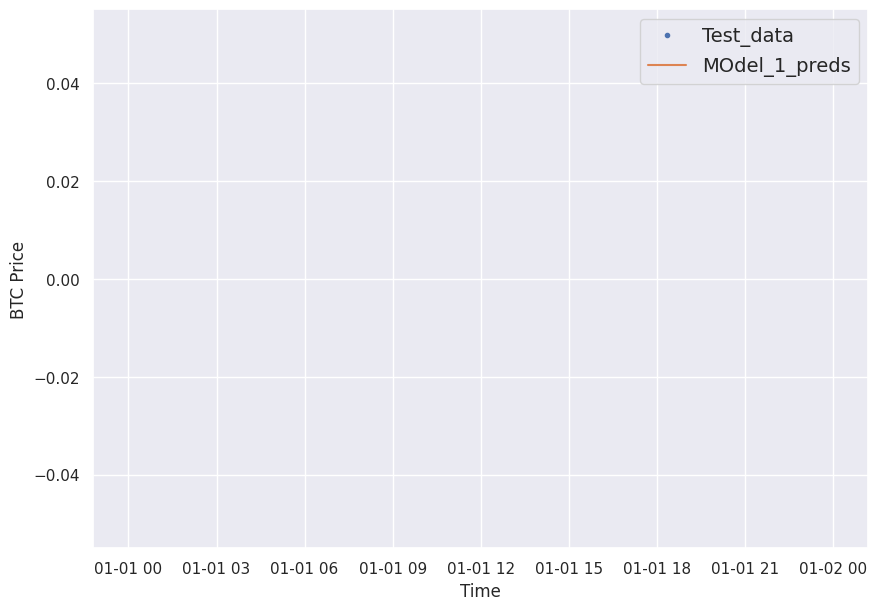

In [ ]:
offset = 550
plt.figure(figsize = (10,7))
plot_time_series(X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset ,
                 label = "Test_data")

plot_time_series(X_test[-len(test_windows):],
                 values = model_1_preds,
                 start = offset ,
                 format ="-",
                 label = "MOdel_1_preds")

## MODEL 2 : Dense (window = 30 , horizon = 1)

### Global Variable

In [ ]:
HORIZON = 1
WINDOW_SIZE = 30

In [ ]:
full_windows , full_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows), len(full_labels)

(2, 2)

In [ ]:
train_windows, test_windows , train_labels , test_labels = make_train_test_splits(windows = full_windows,
                                                                                  labels = full_labels,
                                                                                  test_split = 0.2,
                                                                                )

len(train_windows),len(test_windows),len(train_labels),len(test_labels)

(1, 1, 1, 1)

In [ ]:
tf.random.set_seed(42)

#create model
model_2 = tf.keras.Sequential([
    layers.Dense(128 , activation = 'relu'),
    layers.Dense(HORIZON)
],name = "Model_2_Dense")

model_2.compile(loss = 'mae',
                optimizer = 'adam')

history_2 = model_2.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
                        y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_2.name)])

Epoch 1/100
1/1 [==============================] - 10s 10s/step - loss: 37231.4219 - val_loss: 29691.6895
Epoch 2/100
1/1 [==============================] - 2s 2s/step - loss: 28802.4395 - val_loss: 21308.7285
Epoch 3/100
1/1 [==============================] - 2s 2s/step - loss: 20401.2754 - val_loss: 13040.0801
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 12186.3262 - val_loss: 4802.4570
Epoch 5/100
1/1 [==============================] - 1s 648ms/step - loss: 4037.4375 - val_loss: 3053.4219
Epoch 6/100
1/1 [==============================] - 0s 50ms/step - loss: 3678.9141 - val_loss: 7349.3359
Epoch 7/100
1/1 [==============================] - 0s 38ms/step - loss: 7814.3750 - val_loss: 9259.1445
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 9729.3594 - val_loss: 9538.4180
Epoch 9/100
1/1 [==============================] - 0s 36ms/step - loss: 10006.6953 - val_loss: 8596.5352
Epoch 10/100
1/1 [==============================] - 0s 48ms/s

In [ ]:
model_2.evaluate(test_windows , test_labels)

1/1 [==============================] - 0s 24ms/step - loss: 3951.3203


3951.3203125

### GEt forecast predictions

In [ ]:
model_2_preds = make_preds(model_2_load , test_windows)
model_2_preds[:10]

In [ ]:
model_2_results = evaluate_preds(tf.squeeze(test_labels), model_2_preds)
model_2_results

In [ ]:
ffset = 550
plt.figure(figsize = (10,7))
plot_time_series(X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset ,
                 label = "Test_data")

plot_time_series(X_test[-len(test_windows):],
                 values = model_2_preds,
                 start = offset ,
                 format ="-",
                 label = "MOdel_2_preds")

## Model 3 : DEnse (Window = 30 , Horizon = 7)

In [ ]:
HORIZON = 7
WINDOW_SIZE = 30

In [ ]:
full_windows , full_labels = make_windows(prices , window_size = WINDOW_SIZE , horizon = HORIZON)
len(full_windows), len(full_labels)

In [ ]:
train_windows, test_windows , train_labels , test_labels = make_train_test_splits(windows = full_windows,
                                                                                  labels = full_labels,
                                                                                  test_split = 0.2,
                                                                                )

len(train_windows),len(test_windows),len(train_labels),len(test_labels)

In [ ]:
tf.random.set_seed(42)

# Construct model
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON, activation="linear") # linear activation is the same as having no activation
], name="model_3_dense") # give the model a name so we can save it

model_3.compile(loss = 'mae',
                optimizer = 'adam')

history_3 = model_3.fit(x=train_windows, # train windows of 7 timesteps of Bitcoin prices
                        y=train_labels, # horizon value of 1 (using the previous 7 timesteps to predict next day)
                        epochs=100,
                        verbose=1,
                        batch_size=128,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:
model_3.evaluate(test_windows , test_labels)

### Loading the best model

In [ ]:
model_3_load = tf.keras.models.load_model("/content/model_experiments/model_3_dense/")
model_3_load.evaluate(test_windows , test_labels)

### Making Predictions with model 3

In [ ]:
model_3_preds = make_preds(model_3_load , test_windows)
model_3_preds[:10]

In [ ]:
# Checking the shape of Model_3 prediction
model_3_preds.shape

In [ ]:
test_labels.shape

### Evaluating Results for model 3

In [ ]:
model_3_results = evaluate_preds(test_labels, model_3_preds)
model_3_results

## Visualising the results

In [ ]:
ffset = 300
plt.figure(figsize = (10,7))
plot_time_series(X_test[-len(test_windows):],
                 values = test_labels[:,0],
                 start = offset ,
                 format ='-',
                 label = "Test_data")

plot_time_series(X_test[-len(test_windows):],
                 values = model_3_preds,
                 start = offset ,
                 label = "MOdel_3_preds")

## Model 3: Dense (window = 30, horizon = 7)
Let's try and predict 7 days ahead given the previous 30 days.

First, we'll update the HORIZON and WINDOW_SIZE variables and create windowed data.

In [ ]:

HORIZON = 7
WINDOW_SIZE = 30

full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

In [ ]:
# And we'll split the full dataset windows into training and test sets.


train_windows, test_windows, train_labels, test_labels = make_train_test_splits(windows=full_windows, labels=full_labels, test_split=0.2)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

Now let's build, compile, fit and evaluate a model.

In [ ]:

tf.random.set_seed(42)

# Create model (same as model_1 except with different data input size)
model_3 = tf.keras.Sequential([
  layers.Dense(128, activation="relu"),
  layers.Dense(HORIZON)
], name="model_3_dense")

model_3.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

history_3 = model_3.fit(train_windows,
                        train_labels,
                        batch_size=128,
                        epochs=100,
                        verbose=0,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_3.name)])

In [ ]:

# How did our model with a larger window size and horizon go?
model_3.evaluate(test_windows, test_labels)

In [ ]:

# Load in best version of model_3 and evaluate
model_3 = tf.keras.models.load_model("model_experiments/model_3_dense/")
model_3.evaluate(test_windows, test_labels)

In this case, the error will be higher because we're predicting 7 steps at a time.

This makes sense though because the further you try and predict, the larger your error will be (think of trying to predict the weather 7 days in advance).

Let's make predictions with our model using the make_preds() function and evaluate them using the evaluate_preds() function.

In [ ]:
# The predictions are going to be 7 steps at a time (this is the HORIZON size)
model_3_preds = make_preds(model_3,
                           input_data=test_windows)
model_3_preds[:5]

In [ ]:

# Calculate model_3 results - these are going to be multi-dimensional because
# we're trying to predict more than one step at a time.
model_3_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_3_preds)
model_3_results

### Visulising the model predictions


In [ ]:

offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
# Checking the shape of model_3_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=model_3_preds,
                 start=offset,
                 label="model_3_preds")

## Which of our models is performing best so far?
So far, we've trained 3 models which use the same architecture but use different data inputs.

Let's compare them with the naïve model to see which model is performing the best so far.


In [ ]:
pd.DataFrame({"naive": naive_results["MAE"],
              "horizon_1_window_7": model_1_results["MAE"],
              "horizon_1_window_30": model_2_results["MAE"],
              "horizon_7_window_30": model_3_results["MAE"]}, index=["MAE"]).plot(figsize=(10, 7), kind="bar");

## Model 4: Conv1D
Onto the next modelling experiment!

This time, we'll be using a Conv1D model. Because as we saw in the sequence modelling notebook, Conv1D models can be used for seq2seq (sequence to sequence) problems.

In our case, the input sequence is the previous 7 days of Bitcoin price data and the output is the next day (in seq2seq terms this is called a many to one problem).

In [ ]:
#Before we build a Conv1D model, let's recreate our datasets.


HORIZON = 1 # predict next day
WINDOW_SIZE = 7 # use previous week worth of data

In [ ]:

# Create windowed dataset
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

In [ ]:

# Create train/test splits
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_label)

Data windowed!

Now, since we're going to be using Conv1D layers, we need to make sure our input shapes are correct.

The Conv1D layer in TensorFlow takes an input of: (batch_size, timesteps, input_dim).

In our case, the batch_size (by default this is 32 but we can change it) is handled for us but the other values will be:

timesteps = WINDOW_SIZE - the timesteps is also often referred to as features, our features are the previous WINDOW_SIZE values of Bitcoin
input_dim = HORIZON - our model views WINDOW_SIZE (one week) worth of data at a time to predict HORIZON (one day)
Right now, our data has the timesteps dimension ready but we'll have to adjust it to have the input_dim dimension.

In [ ]:
# Before we pass our data to the Conv1D layer, we have to reshape it in order to make sure it works
x = tf.constant(train_windows[0])
expand_dims_layer = layers.Lambda(lambda x: tf.expand_dims(x, axis=1)) # add an extra dimension for timesteps
print(f"Original shape: {x.shape}") # (WINDOW_SIZE)
print(f"Expanded shape: {expand_dims_layer(x).shape}") # (WINDOW_SIZE, input_dim)
print(f"Original values with expanded shape:\n {expand_dims_layer(x)}")

In [ ]:

tf.random.set_seed(42)

# Create model
model_4 = tf.keras.Sequential([
  # Create Lambda layer to reshape inputs, without this layer, the model will thow an error
  layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
  layers.Conv1D(filters=128, kernel_size=5, padding="causal", activation="relu"),
  layers.Dense(HORIZON)
], name="model_4_conv1D")

# Compile model
model_4.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

# Fit model
history_4 = model_4.fit(train_windows,
                        train_labels,
                        batch_size=128,
                        epochs=100,
                        verbose=1,
                        validation_data=(test_windows, test_labels),
                        callbacks=[create_model_checkpoint(model_name=model_4.name)])

In [ ]:
model_4.evaluate(test_windows , test_labels)

In [ ]:
## loading our best saved model

model_4 = tf.keras.models.load_model("/content/model_experiments/model_4_conv1D")
model_4.evaluate(test_windows , test_labels)

In [ ]:
model_preds = model_4.predict(test_windows)
tf.squeeze(model_preds[:5])

In [ ]:
model_4_preds = make_preds(model_4 , test_windows)
model_4_preds[:10]

In [ ]:
model_4_results = evaluate_preds(tf.squeeze(test_labels),
                                 model_4_preds)
model_4_results

In [ ]:
offset = 300
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=test_labels[:, 0],
                 start=offset,
                 label="Test_data")
# Checking the shape of model_4_preds results in [n_test_samples, HORIZON] (this will screw up the plot)
plot_time_series(timesteps=X_test[-len(test_windows):],
                 values=tf.squeeze(model_4_preds),
                 start=offset,
                 format = "-",
                 label="model_4_preds")

## Model_5 : LSTM Model!!

In [ ]:
HORIZON = 1
WINDOW_SIZE = 7

In [ ]:
tf.random.set_seed(42)

inputs = layers.Input(shape=(WINDOW_SIZE))
x= layers.Lambda(lambda x: tf.expand_dims(x , axis=1))(inputs)
# x=layers.LSTM(128,return_sequences=True)(x)
x=layers.LSTM(128, activation='relu')(x)
# x=layers.Dense(32 , activation = 'relu')(x)

outputs = layers.Dense(HORIZON)(x)

model_5 = tf.keras.Model(inputs,outputs, name = 'model_5_lstm')

model_5.compile(loss = "mae",
                optimizer='adam')

history_5 = model_5.fit(train_windows,
                        train_labels,
                        epochs = 100,
                        batch_size = 128,
                        verbose = 1,
                        validation_data = (test_windows, test_labels),
                        callbacks = [create_model_checkpoint(model_5.name)]
                        )

In [ ]:
model_5 = tf.keras.models.load_model("/content/model_experiments/model_5_lstm")
model_5.evaluate(test_windows, test_labels)

In [ ]:
model_5_preds = make_preds(model_5, test_windows)

model_5_results = evaluate_preds (tf.squeeze(test_labels),
                                  model_5_preds)
model_5_results

## MultiVariate time series Data

What features can we use?

One feature we could add is weather or not Ved Prakash has tweeted on that day?

What's better features to Use?